In [1]:
# 1. 데이터 로드
import pandas as pd
data_raw = pd.read_csv('../data/basketball.csv', encoding='utf-8')
data_raw.shape # 100 x 8
data_raw.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [2]:
import copy
data = data_raw.copy()
data_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [4]:
# minus font 
mpl.rcParams['axes.unicode_minus'] = False

# customize matplitlib
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

scaling

In [13]:
data_real = data.iloc[:,2:]
data_real

,3P,2P,TRB,AST,STL,BLK
0,1.4,0.6,1.3,0.6,0.5,0.1
1,0.0,4.7,7.7,1.1,1.1,1.0
2,0.0,2.3,4.5,0.3,0.5,0.6
3,0.0,0.8,2.6,0.4,0.4,0.6
4,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...
95,0.3,6.1,10.4,2.8,1.0,1.0
96,0.8,6.2,4.5,3.8,1.4,0.7
97,1.8,4.3,3.3,4.3,0.9,0.4
98,0.0,7.0,14.1,0.7,0.7,2.1


In [14]:
# 열별로 scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data_real), columns=data_real.columns, index = data_real.index)

In [28]:
# PCA 주성분분석
pca = PCA(n_components=6, random_state=1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.452424
1    0.792747
2    0.874615
3    0.927171
4    0.969828
5    1.000000
dtype: float64

-> 설명가능한 분산량이 92%에 해당하는 지점이 4번째 주성분 값임

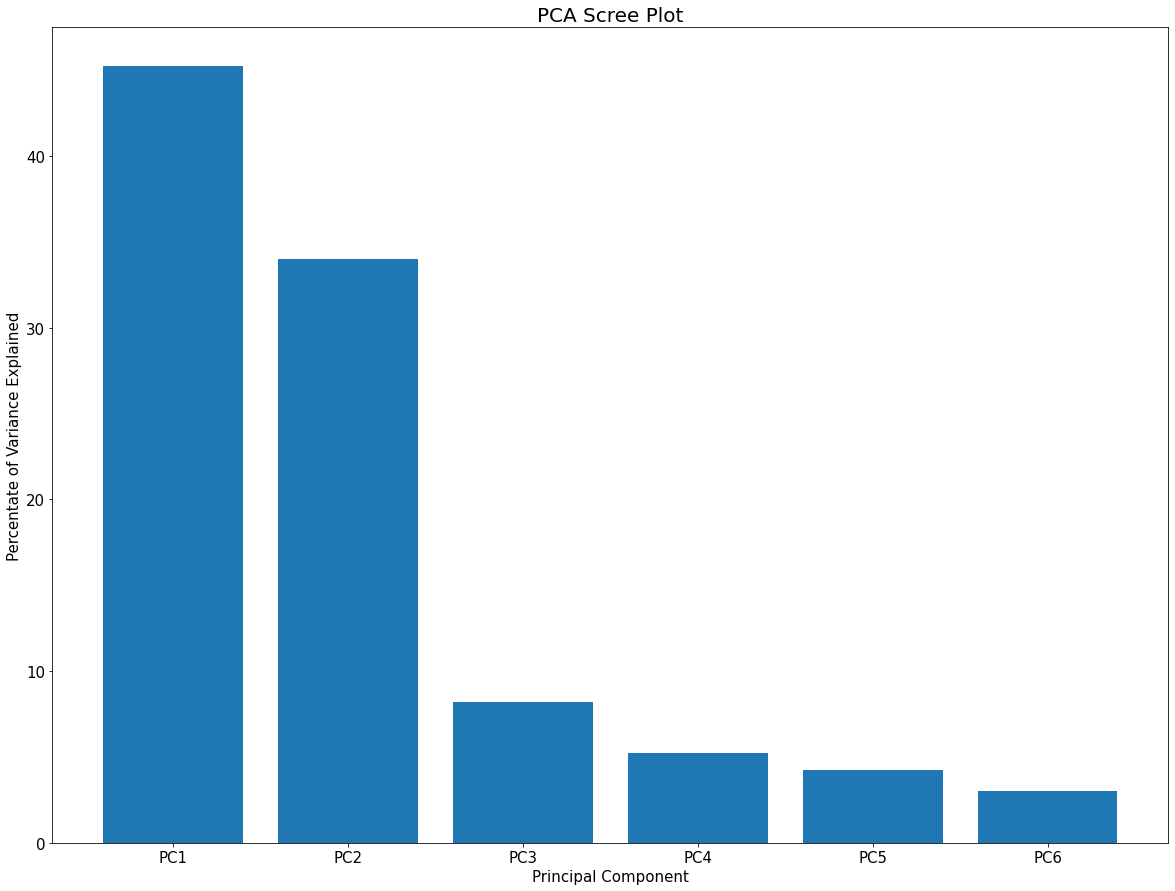

In [16]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [22]:
# 4개의 주성분으로 어떻게 표현되는지
X_pp = pd.DataFrame(X_p[:,:4], columns = ['PC1','PC2','PC3','PC4'], index = data_real.index)
X_pp

,PC1,PC2,PC3,PC4
0,-0.294478,-0.445634,0.013963,0.073556
1,0.383955,0.132914,0.235968,0.147351
2,0.225135,-0.371204,0.135996,0.021959
3,0.116076,-0.525973,0.153815,-0.055862
4,-0.200379,0.180133,-0.004845,-0.147454
...,...,...,...,...
95,0.415470,0.434160,0.109916,-0.018071
96,-0.043774,0.516716,0.253050,-0.113324
97,-0.338798,0.327908,-0.014532,-0.230887
98,0.932956,0.319154,-0.169552,0.206734


ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 6.

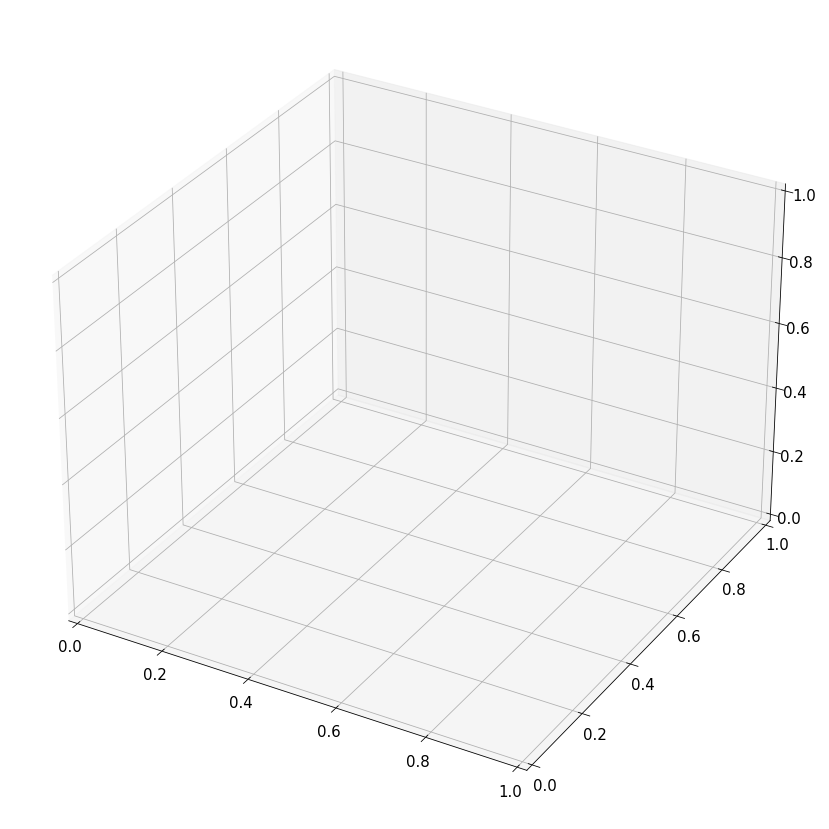

In [25]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_p[0],X_p[1],X_p[2],X_p[3], s=100, c = data_real.index)
plt.show()